# K-means Project

## House grouping system

#### House grouping system

We want to be able to classify houses according to their region and median income. To do this, we will use the famous California Housing dataset. It was constructed using data from the 1990 California census. It contains one row per census block group. A block group is the smallest geographic unit for which US Census data is published.

#### Step 1: Loading the dataset

In [34]:
import pandas as pd

raw_data =pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv")
raw_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [35]:
total_data = raw_data[['MedInc', 'Latitude', 'Longitude']]
total_data.head()

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


In [36]:
# Verify Nulls:

total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MedInc     20640 non-null  float64
 1   Latitude   20640 non-null  float64
 2   Longitude  20640 non-null  float64
dtypes: float64(3)
memory usage: 483.9 KB


In [37]:
# Dataset Shape:

total_data.shape

(20640, 3)

#### Step 1.1: Split dataset in train and test:

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(total_data, test_size = 0.2, random_state = 42)

X_train.head()

,MedInc,Latitude,Longitude
14196,3.2596,32.71,-117.03
8267,3.8125,33.77,-118.16
17445,4.1563,34.66,-120.48
14265,1.9425,32.69,-117.11
2271,3.5542,36.78,-119.80


#### Step 2:  Build a K-Means:

In [39]:
from sklearn.cluster import KMeans

model_unsupervised = KMeans(n_clusters = 6, n_init = "auto", random_state = 42)
model_unsupervised.fit(X_train)

KMeans(n_clusters=6, random_state=42)

In [40]:
# Include "cluster" column to our dataset:

y_train = list(model_unsupervised.labels_)
X_train["cluster"] = y_train
X_train.head()

,MedInc,Latitude,Longitude,cluster
14196,3.2596,32.71,-117.03,3
8267,3.8125,33.77,-118.16,1
17445,4.1563,34.66,-120.48,1
14265,1.9425,32.69,-117.11,3
2271,3.5542,36.78,-119.80,5


#### 2.1: Plotting Results:

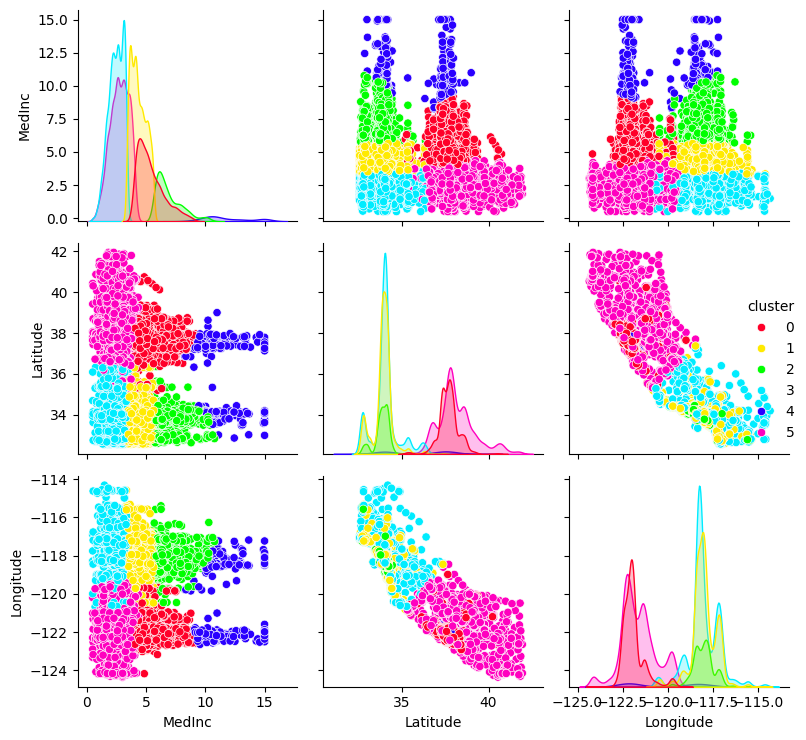

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(data = X_train , hue = 'cluster' , palette = 'gist_rainbow')
plt.tight_layout()
plt.show()

#### Step 3: Predict with the test set:

In [42]:
y_test = list(model_unsupervised.predict(X_test))
X_test["cluster"] = y_test
X_test.head()

,MedInc,Latitude,Longitude,cluster
20046,1.6812,36.06,-119.01,3
3024,2.5313,35.14,-119.46,3
15663,3.4801,37.80,-122.44,5
20484,5.7376,34.28,-118.72,2
9814,3.7250,36.62,-121.93,5


Graficamos la prediccion del modelo encima de los datos de entrenamiento para comprobar que se parezcan los resultados:

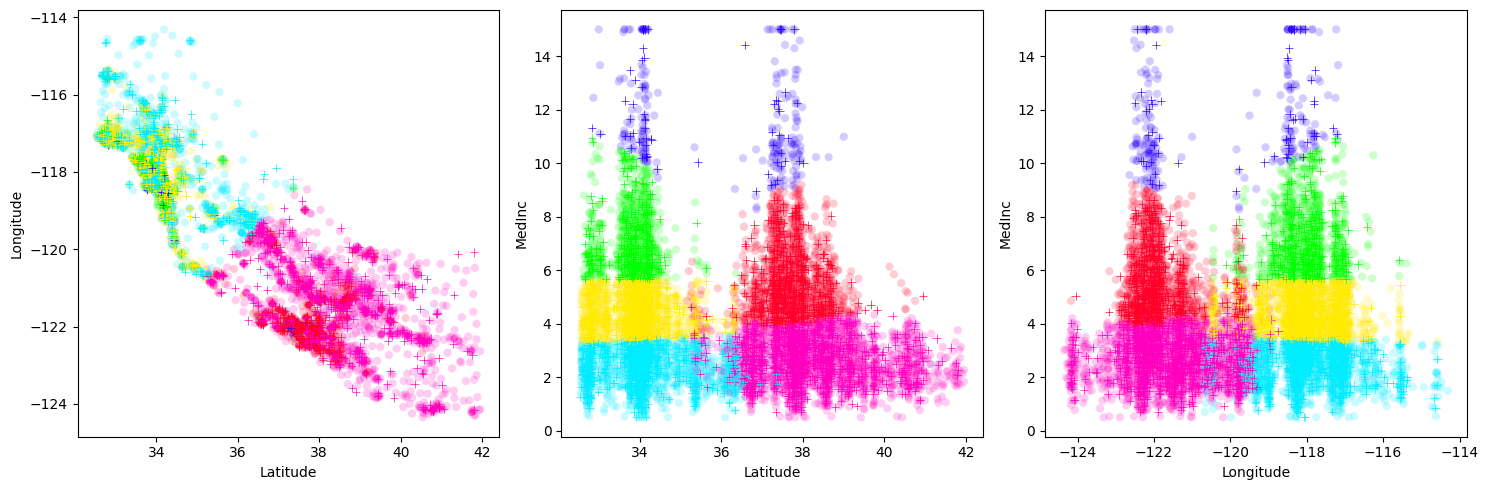

In [43]:
fig, axis = plt.subplots(1, 3, figsize = (15, 5))

sns.scatterplot(ax = axis[0], data = X_train, x = "Latitude", y = "Longitude", hue = "cluster", palette = "gist_rainbow", alpha  = 0.2)
sns.scatterplot(ax = axis[1], data = X_train, x = "Latitude", y = "MedInc", hue = "cluster", palette = "gist_rainbow", alpha  = 0.2)
sns.scatterplot(ax = axis[2], data = X_train, x = "Longitude", y = "MedInc", hue = "cluster", palette = "gist_rainbow", alpha  = 0.2)

sns.scatterplot(ax = axis[0], data = X_test, x = "Latitude", y = "Longitude", hue = "cluster", palette = "gist_rainbow", marker = "+")
sns.scatterplot(ax = axis[1], data = X_test, x = "Latitude", y = "MedInc", hue = "cluster", palette = "gist_rainbow", marker = "+")
sns.scatterplot(ax = axis[2], data = X_test, x = "Longitude", y = "MedInc", hue = "cluster", palette = "gist_rainbow", marker = "+")

plt.tight_layout()

for ax in axis:
    ax.legend([],[], frameon=False)

plt.show()

#### Step 4: Train a supervised classification model:

Decision trees can help understand and explain the clusters identified in the data. By dividing the dataset into smaller subgroups based on certain characteristics, decision trees can reveal patterns or rules that describe the distinctive features of each cluster.

In [44]:
from sklearn.tree import DecisionTreeClassifier

model_supervised = DecisionTreeClassifier(random_state = 42)
model_supervised.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [45]:
from sklearn.metrics import accuracy_score

y_pred = model_supervised.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

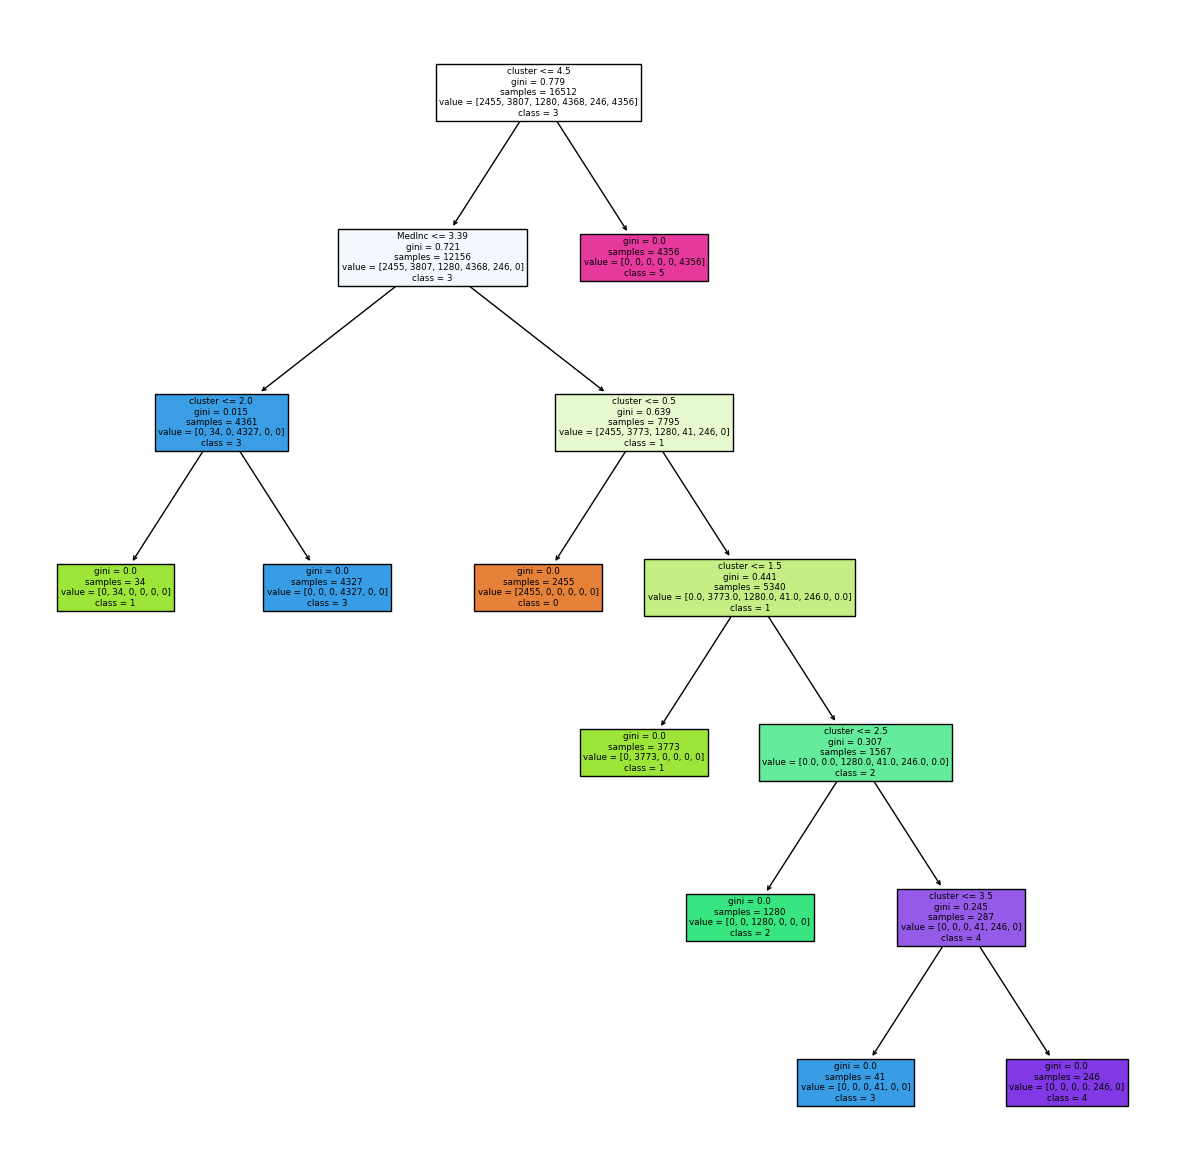

In [47]:
from sklearn import tree

fig = plt.figure(figsize=(15,15))

tree.plot_tree(model_supervised, feature_names = list(X_train.columns), class_names = ["0", "1", "2", "3", "4", "5"], filled = True)

plt.show()

#### Step 5: Save the models

In [48]:
from pickle import dump

dump(model_unsupervised, open("/workspaces/machine-learning-K-means-Juli-MM/models/k-means_default_42.sav", "wb"))
dump(model_supervised, open("/workspaces/machine-learning-K-means-Juli-MM/models/decision_tree_classifier_default_42.sav", "wb"))